In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [10]:
df = pd.read_csv('customer_purchase_intention.csv')
df.drop('CustomerID',axis=1,inplace=True)

In [11]:
label = LabelEncoder()
for i in df.select_dtypes(include=['object']).columns:
    df[i] = label.fit_transform(df[i])
df

,Age,Gender,DeviceType,TimeOnSite,PageViews,AdClicks,SessionDuration,Country,ReturningVisitor,Purchase
0,56,0,0,11.72,3,0,30.87,1,0,0
1,69,0,1,4.64,5,1,21.67,1,0,0
2,46,0,0,5.02,13,5,54.86,3,1,1
3,32,0,1,10.21,15,9,21.05,2,0,0
4,60,1,0,15.33,14,4,27.88,3,1,1
...,...,...,...,...,...,...,...,...,...,...
795,68,0,1,1.06,18,1,41.95,1,0,1
796,22,1,1,13.16,10,5,11.78,3,1,1
797,64,1,0,6.67,9,6,19.82,2,0,1
798,42,1,1,5.57,8,4,25.52,0,0,0


In [12]:
X= df[['Age','SessionDuration']].values
y =df['Purchase'].values

In [13]:
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled


array([[ 0.80839757,  0.08582271],
       [ 1.6835235 , -0.44936032],
       [ 0.13522378,  1.48137062],
       ...,
       [ 1.34693661, -0.55697865],
       [-0.13404573, -0.22539786],
       [-1.68234545,  1.46450072]], shape=(800, 2))

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=31)

kernel :LINEAR|| Accuracy:0.60


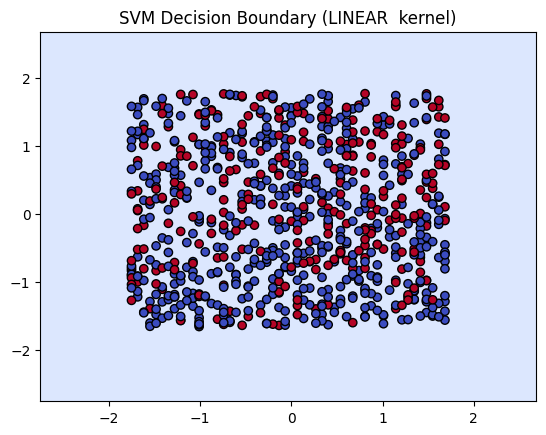

kernel :POLY|| Accuracy:0.60


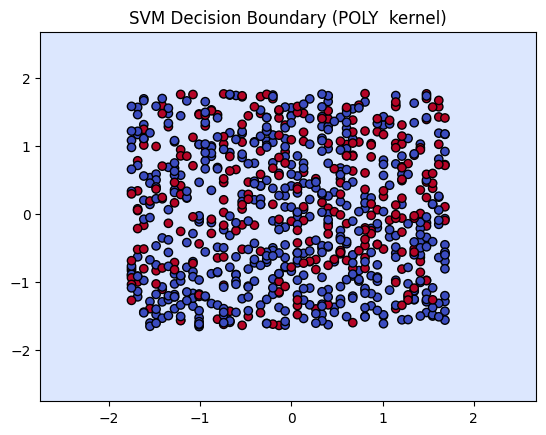

kernel :RBF|| Accuracy:0.61


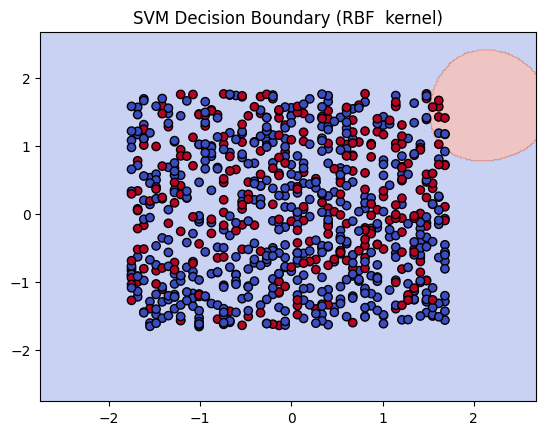

kernel :SIGMOID|| Accuracy:0.55


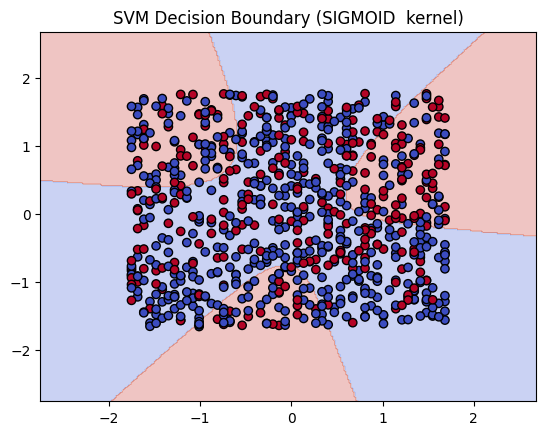

In [15]:
kernels = ['linear','poly','rbf','sigmoid']

for kernel in kernels:
    svm = SVC(kernel=kernel,degree =3,gamma='auto')
    svm.fit(X_train,y_train)

    acc = svm.score(X_test,y_test)
    print(f'kernel :{kernel.upper()}|| Accuracy:{acc:.2f}')
    


    plt.Figure(figsize=(6,5))
  
    plt.title(f'SVM Decision Boundary ({kernel.upper()}  kernel)')
    x_min,x_max = X_scaled[:,0].min()-1, X_scaled[:, 0].max()+1
    y_min,y_max = X_scaled[:,0].min()-1, X_scaled[:, 0].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min,x_max,300),
                         np.linspace(y_min,y_max,300))
    
    Z = svm.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)


    plt.contourf(xx,yy,Z,alpha=0.3,cmap=plt.cm.coolwarm)
    plt.scatter(X_scaled[:,0],X_scaled[:,1],c=y,cmap=plt.cm.coolwarm,edgecolor='k')
    plt.show()